In [39]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 30]


import seaborn as sea

dflt_w = 8
dflt_h = 6
sea.set(rc={'figure.figsize':(10,10)})



In [20]:
df = pd.read_csv('Pokemon.csv', index_col=0);

In [21]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


<Figure size 1656x720 with 0 Axes>

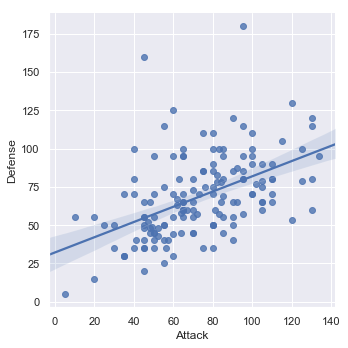

In [30]:
plt.figure(figsize=(23,10))
ax = sea.lmplot(x='Attack', y='Defense', data=df);

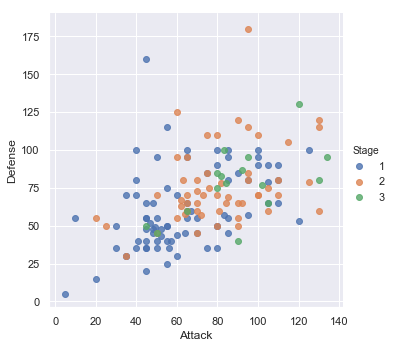

In [28]:
sea.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage');

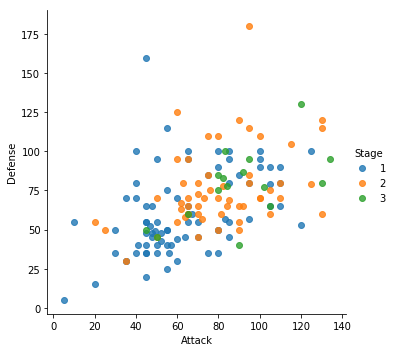

In [6]:
sea.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage');

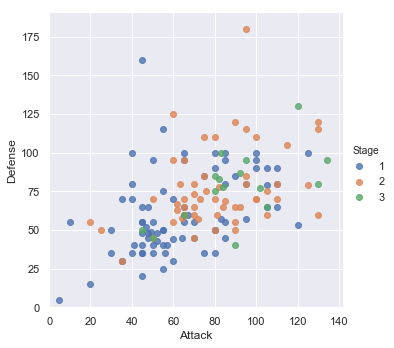

In [24]:
sea.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage');


plt.ylim(0,None);
plt.xlim(0,None);

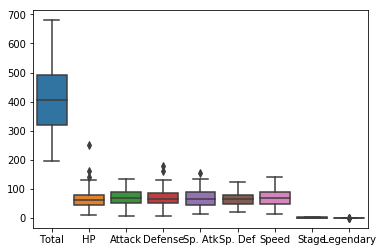

In [8]:
sea.boxplot(data=df)

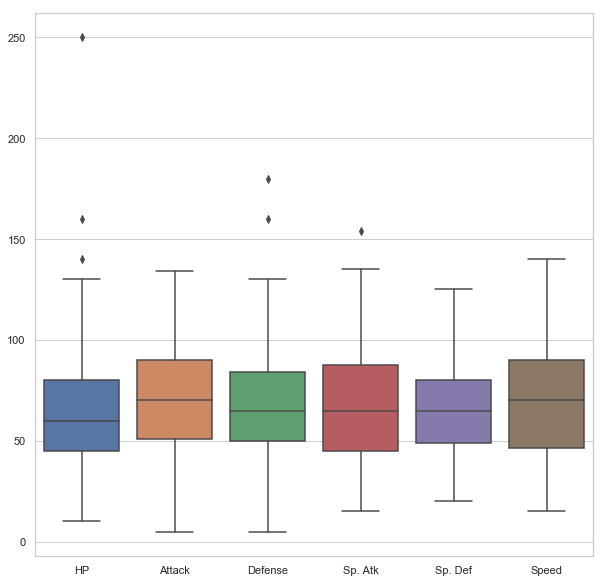

In [52]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1);

sea.boxplot(data=stats_df)

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


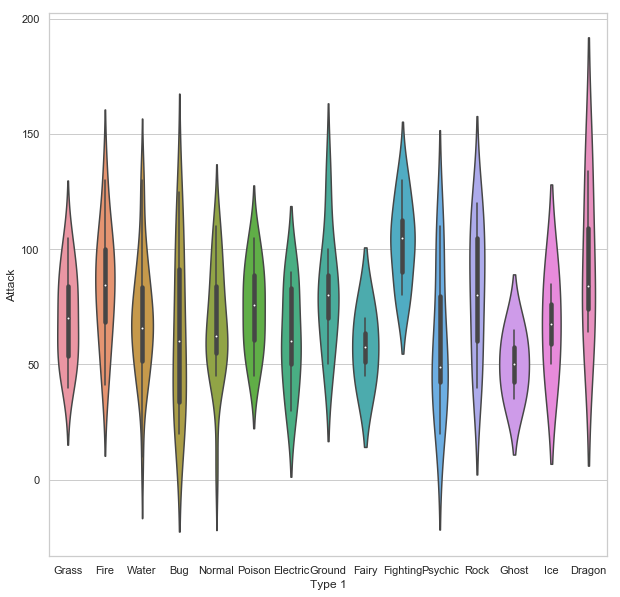

In [53]:
sea.set_style('whitegrid');

sea.violinplot(x='Type 1', y='Attack', data=stats_df);

In [54]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ];



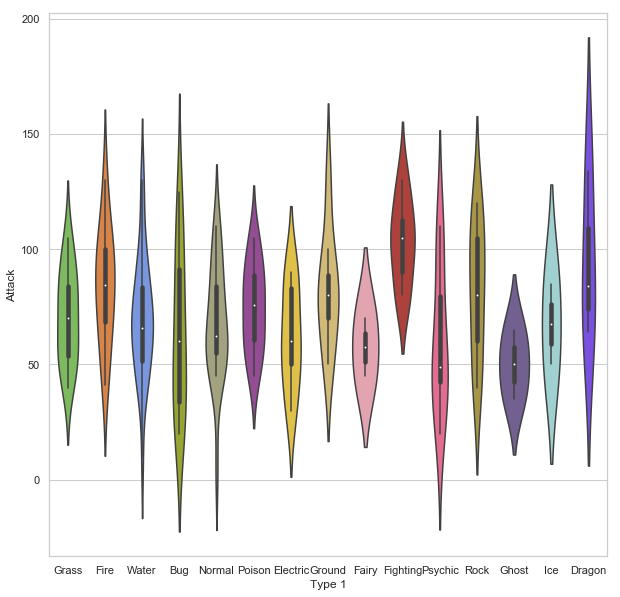

In [55]:
sea.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors);

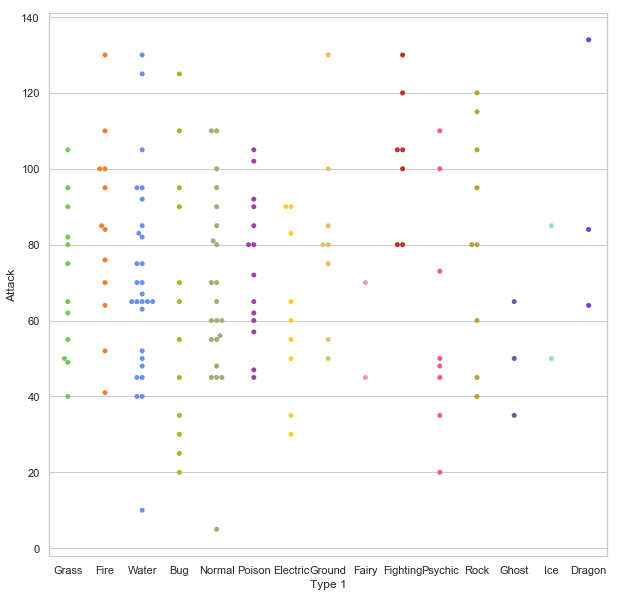

In [56]:
sea.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors);

Text(0.5, 1.0, 'Attack by Type')

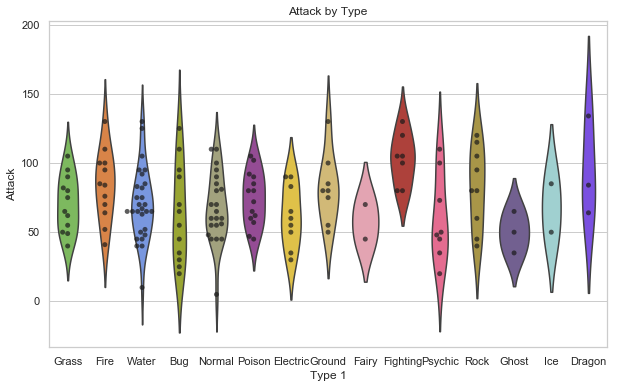

In [57]:
plt.figure(figsize=(10,6))

sea.violinplot(x='Type 1', y='Attack', 
               data=stats_df,
               inner=None,
               palette=pkmn_type_colors)

sea.swarmplot(x='Type 1', 
                y='Attack', 
             data=stats_df, 
             color='k', 
             alpha=0.7)

plt.title('Attack by Type')

In [58]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [59]:
melted_df = pd.melt(stats_df, 
                   id_vars=["Name", "Type 1", "Type 2"], 
                   var_name="Stat")

melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [49]:
#display(melted_df)

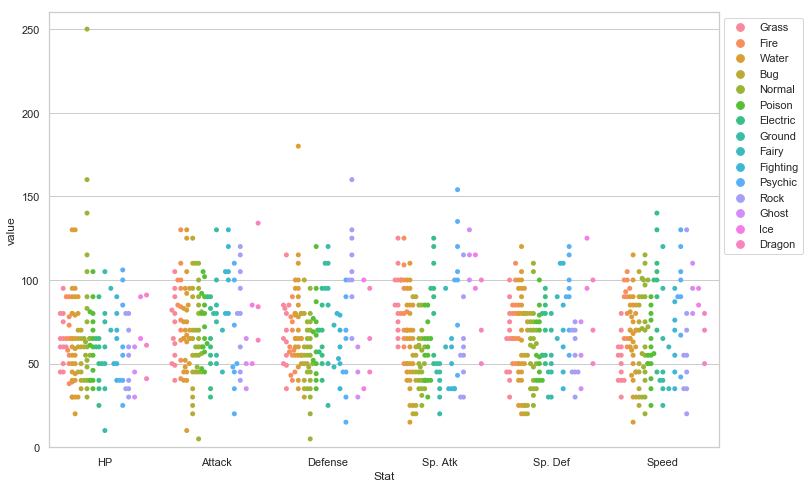

In [65]:
plt.figure(figsize=(12,8))

sea.swarmplot(x='Stat', y='value', data=melted_df, dodge=True, hue='Type 1');

plt.ylim(0,260)
plt.legend(bbox_to_anchor=(1,1), loc=2)
              

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


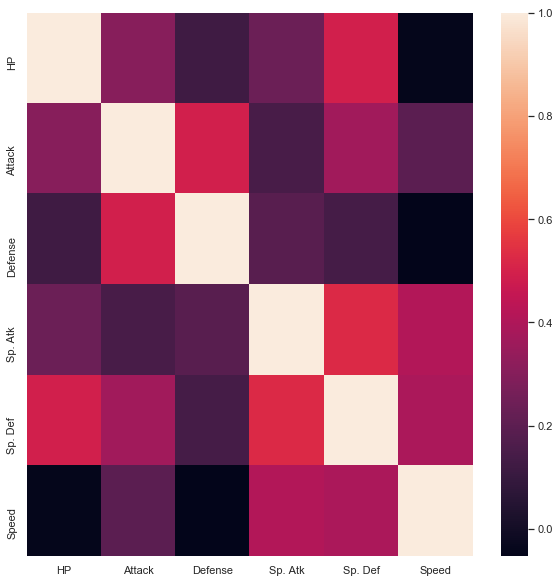

In [68]:
corr=stats_df.corr()
display(corr)

sea.heatmap(corr)